In [15]:
import tensorflow
from tensorflow.keras import datasets, models, layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#importing dataset
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

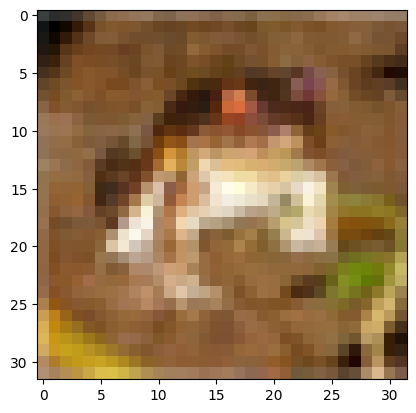

In [17]:
plt.imshow(x_train[0])

In [18]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [19]:
classes =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [20]:
#function to plot image
def plot_image(x,y,index):
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

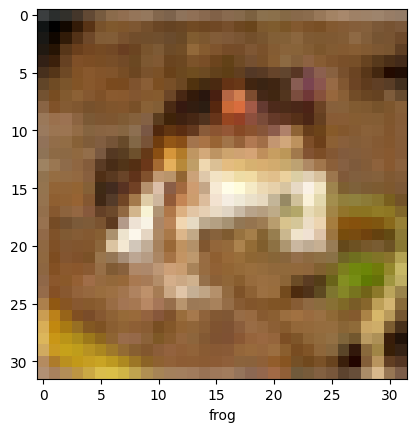

In [21]:
plot_image(x_train,y_train,0)

In [22]:
x_train= x_train/255
x_test= x_test/255

In [23]:


cnn = models.Sequential([
    # CNN
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # ANN
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


C:\Users\vaibh\Downloads\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
     metrics=['accuracy']
)

In [25]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.3773 - loss: 1.6906
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.5891 - loss: 1.1614
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6513 - loss: 1.0011
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6851 - loss: 0.9089
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7083 - loss: 0.8434
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7337 - loss: 0.7768
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.7467 - loss: 0.7297
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7608 - loss: 0.6893
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7750 - loss: 0.6505
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7897 - loss: 0.6081


In [26]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6927 - loss: 0.9055


[0.9144415259361267, 0.6966000199317932]

In [27]:
y_pred= cnn.predict(x_test)
y_pred_c= [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [28]:
#performance metrics
from sklearn.metrics import classification_report
print('classification_report for cnn\n',classification_report(y_test,y_pred_c))

classification_report for cnn
               precision    recall  f1-score   support

           0       0.72      0.77      0.74      1000
           1       0.88      0.70      0.78      1000
           2       0.63      0.54      0.58      1000
           3       0.49      0.56      0.53      1000
           4       0.67      0.64      0.65      1000
           5       0.61      0.57      0.59      1000
           6       0.71      0.81      0.76      1000
           7       0.76      0.75      0.75      1000
           8       0.82      0.78      0.80      1000
           9       0.71      0.84      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

